In [1]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import string
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
data_dir = '../data/nsidc/'
f_name = 'Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx'

df = pd.read_excel(f'{data_dir}{f_name}')

# df.drop(index=59,inplace=True)
df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

df[df.isnull()] = np.nan

df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,NaN,...,12.959,13.011,13.073,12.721,12.643,12.484,12.934,13.046,12.702,13.302
1,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,14.305,...,12.961,13.103,13.125,12.806,12.644,12.600,12.992,13.072,12.671,13.438
2,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,NaN,...,13.012,13.116,13.112,12.790,12.713,12.634,12.980,13.170,12.704,13.411
3,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,14.417,...,13.045,13.219,13.051,12.829,12.954,12.724,13.045,13.193,12.770,13.436
4,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,NaN,...,13.065,13.148,13.115,12.874,12.956,12.834,13.147,13.166,12.814,13.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.383,NaN,NaN,13.953,NaN,13.664,13.394,NaN,13.766,NaN,...,12.693,12.967,12.680,12.291,12.291,12.325,12.721,12.579,12.947,NaN
362,NaN,14.101,14.172,NaN,14.144,NaN,NaN,13.571,NaN,NaN,...,12.870,12.930,12.745,12.484,12.235,12.344,12.712,12.582,12.978,NaN
363,14.500,NaN,NaN,14.128,NaN,13.855,13.494,NaN,13.904,NaN,...,12.897,12.936,12.762,12.525,12.223,12.523,12.780,12.608,13.050,NaN
364,NaN,14.092,14.093,NaN,14.159,NaN,NaN,13.701,NaN,NaN,...,12.804,13.038,12.800,12.617,12.273,12.569,12.858,12.622,13.149,NaN


In [5]:
timeseries = []

for col in df.columns[:]:
    
    timeseries += list(df[col])
    
timeseries = np.array(timeseries)

timeseries[np.isnan(timeseries)] = np.nan

x = np.arange(len(timeseries))[~np.isnan(timeseries)]

y = timeseries[~np.isnan(timeseries)]

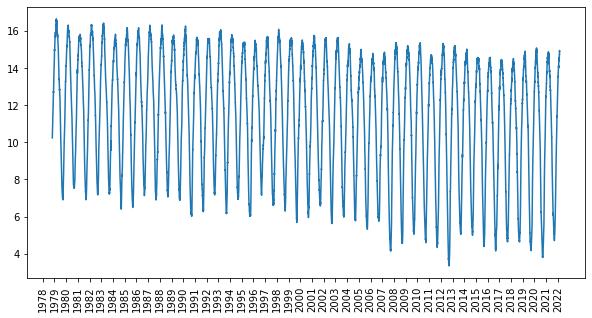

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y)

ax.set_xticks(np.arange(0,366*45,366))
ax.set_xticklabels(np.arange(1978,2023),rotation=90)

# plt.plot(np.arange(300,350),timeseries[300:350],color='k')

plt.show()

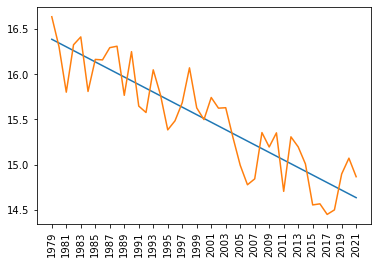

In [7]:
doy_maxs = []
years = []
specials = []

for col in df.columns:
    
    doy_min = np.max(df[col])
    doy_maxs.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = years[1:-1]
doy_maxs = doy_maxs[1:-1]

max_stats = linregress(years,doy_maxs)

plt.plot([years[0],years[-1]],[years[0]*max_stats[0]+max_stats[1],years[-1]*max_stats[0]+max_stats[1]])
    
plt.plot(years,doy_maxs)
# plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.show()

In [10]:
np.nanmax(doy_maxs)

16.635

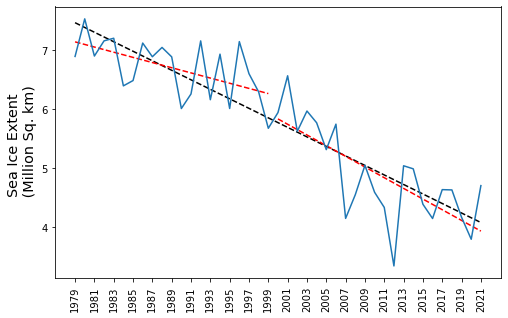

In [12]:
doy_mins = []
years = []
specials = []

for col in df.columns[:-1]:
    
    doy_min = np.min(df[col])
    doy_mins.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = np.array(years[1:])
doy_mins = np.array(doy_mins[1:])

BP = 1999

stats = linregress(years,doy_mins)
stats_a = linregress(years[years<=BP],doy_mins[years<=BP])
stats_b = linregress(years[years>BP],doy_mins[years>BP])

plt.figure(figsize=(8,5))

plt.plot([years[0],years[-1]],[years[0]*stats[0]+stats[1],years[-1]*stats[0]+stats[1]],color='k', ls='--')

plt.plot([years[0],BP],[years[0]*stats_a[0]+stats_a[1],BP*stats_a[0]+stats_a[1]],color='r', ls='--')

plt.plot([BP+1,years[-1]],[(BP+1)*stats_b[0]+stats_b[1],years[-1]*stats_b[0]+stats_b[1]],color='r', ls='--')
 
plt.plot(years,doy_mins)
# plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.ylabel('Sea Ice Extent \n (Million Sq. km)', fontsize='x-large')
plt.show()

In [35]:
stats_a[0], stats_b[0]

(-0.04388441558441557, -0.09063241106719369)

In [13]:
np.nanmin(doy_mins)

3.34

In [22]:
stats_a = linregress(years[:21],doy_mins[:21])
stats_b = linregress(years[21:],doy_mins[21:])
# stats

Text(0, 0.5, 'Standard Deviations \n From Linear Trend')

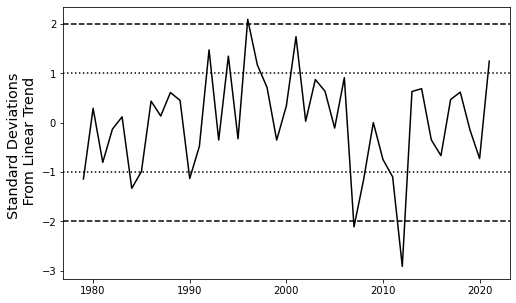

In [23]:
trendpoints = [x*stats[0] + stats[1] for x in years]

# plt.plot(years,trendpoints)
# plt.plot(years,doy_mins)


plt.figure(figsize=(8,5))

detrended = np.array(doy_mins) - np.array(trendpoints)

std = np.std(detrended)

plt.plot(years,detrended/std,color='k')

# plt.axhline(-2*std,ls='--',color='k')
# plt.axhline(2*std,ls='--',color='k')

# plt.axhline(-1*std,ls=':',color='k')
# plt.axhline(1*std,ls=':',color='k')

plt.axhline(-2,ls='--',color='k')
plt.axhline(2,ls='--',color='k')

plt.axhline(-1,ls=':',color='k')
plt.axhline(1,ls=':',color='k')

plt.ylabel('Standard Deviations \n From Linear Trend', fontsize='x-large')

Text(0, 0.5, 'Departure From Linear Trend \n (Million Sq. km)')

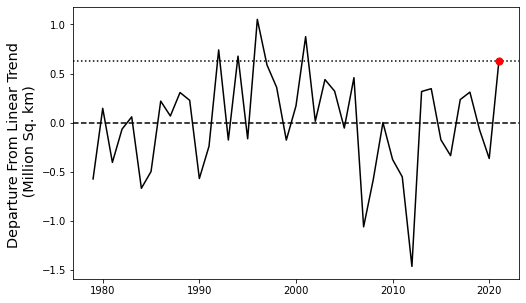

In [24]:
trendpoints = [x*stats[0] + stats[1] for x in years]

# plt.plot(years,trendpoints)
# plt.plot(years,doy_mins)


plt.figure(figsize=(8,5))

detrended = np.array(doy_mins) - np.array(trendpoints)

std = np.std(detrended)

plt.plot(years,detrended,color='k')

# plt.axhline(-2*std,ls='--',color='k')
# plt.axhline(2*std,ls='--',color='k')

# plt.axhline(-1*std,ls=':',color='k')
# plt.axhline(1*std,ls=':',color='k')

# plt.axhline(-2,ls='--',color='k')
# plt.axhline(2,ls='--',color='k')

# plt.axhline(-1,ls=':',color='k')
# plt.axhline(1,ls=':',color='k')

plt.axhline(0,ls='--',color='k')
plt.axhline(detrended[-1],ls=':',color='k')
plt.scatter([2021],detrended[-1],color='r',zorder=5,s=50)

plt.ylabel('Departure From Linear Trend \n (Million Sq. km)', fontsize='x-large')

In [25]:
list(zip(years,detrended/std))

[(1979, -1.1391664256721088),
 (1980, 0.29064842038164895),
 (1981, -0.8040187464687248),
 (1982, -0.1301559610166781),
 (1983, 0.11798645346493151),
 (1984, -1.328795225823606),
 (1985, -0.9891428250586312),
 (1986, 0.4366933259393267),
 (1987, 0.1357758227207478),
 (1988, 0.6107038553828718),
 (1989, 0.4530193741730379),
 (1990, -1.131027284540547),
 (1991, -0.47705797436749203),
 (1992, 1.473965923995919),
 (1993, -0.3507917855934739),
 (1994, 1.34758497672668),
 (1995, -0.3259823207423719),
 (1996, 2.0925382466773055),
 (1997, 1.1689549672262665),
 (1998, 0.7148577043594465),
 (1999, -0.35195859710033744),
 (2000, 0.3398083161028013),
 (2001, 1.7417722967659692),
 (2002, 0.028418048738933405),
 (2003, 0.873364721590315),
 (2004, 0.6380956867924098),
 (2005, -0.10843566267559643),
 (2006, 0.911573592630918),
 (2007, -2.108781981225915),
 (2008, -1.1504424992842783),
 (2009, 0.002853040391483324),
 (2010, -0.7456676566044228),
 (2011, -1.0963188480204815),
 (2012, -2.9111298199703786

In [26]:
import pickle
pickle.dump(detrended/std, open('anomalies.p', 'wb'))

(3.1, 11.0)

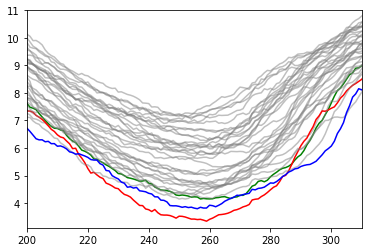

In [27]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(200,310)
plt.ylim(3.1,11)

(12.0, 17.0)

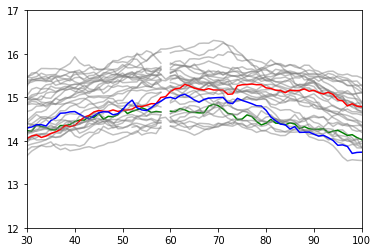

In [28]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(30,100)
plt.ylim(12,17)

# Summary plot

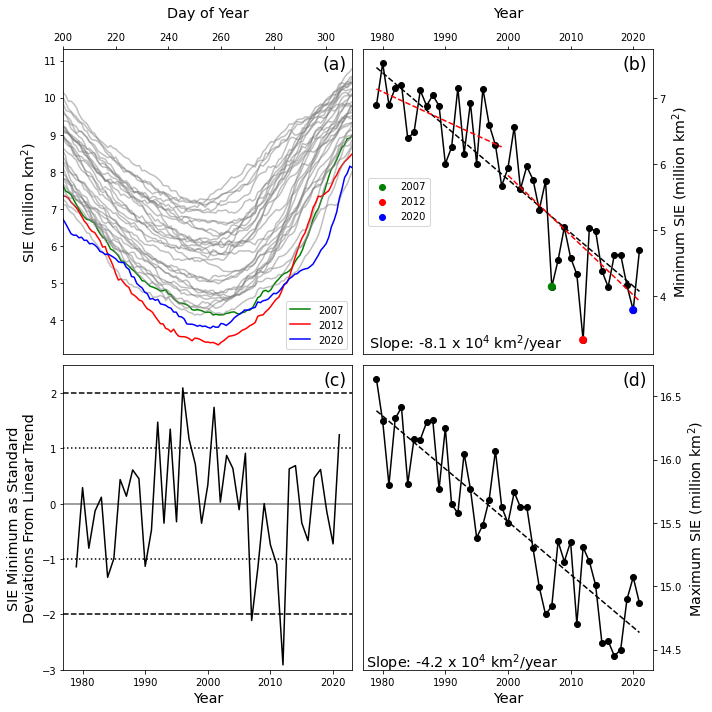

In [34]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

for ax, letter in zip(axs.reshape(-1),string.ascii_letters):
    ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.98,0.98),
                va='top',ha='right',
                xycoords='axes fraction',
                 zorder=10)

TL_ax, TR_ax, BL_ax, BR_ax = axs.reshape(-1)

#####################################

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    TL_ax.plot(df.index,df[col],color=color,alpha=alpha)

TL_ax.set_xlim(200,310)
TL_ax.set_ylim(3.1,11.3)

TL_ax.set_xlabel('Day of Year', fontsize='x-large', labelpad=15)
TL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TL_ax.plot([],[],color=color,label=str(year))
TL_ax.legend(loc='lower right')

TL_ax.xaxis.set_label_position('top') 
TL_ax.xaxis.tick_top()



#####################################

TR_ax.plot(years,doy_mins,color='k',marker='o')

TR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)


TR_ax.plot([years[0],years[-1]],[years[0]*stats[0]+stats[1],years[-1]*stats[0]+stats[1]],color='k',ls='--')

round_slope = np.round(100*stats[0],decimals=1)

TR_ax.annotate(xy=(0.02,0.02),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='left')


TR_ax.yaxis.set_label_position('right') 
TR_ax.yaxis.tick_right()

TR_ax.set_xlabel('Year', fontsize='x-large', labelpad=15)
TR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

TR_ax.xaxis.set_label_position('top') 
TR_ax.xaxis.tick_top()

TR_ax.plot([years[0],BP],[years[0]*stats_a[0]+stats_a[1],BP*stats_a[0]+stats_a[1]],color='r', ls='--')

TR_ax.plot([BP+1,years[-1]],[(BP+1)*stats_b[0]+stats_b[1],years[-1]*stats_b[0]+stats_b[1]],color='r', ls='--')
 
for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TR_ax.scatter([],[],color=color,label=str(year))
TR_ax.legend(loc='center left')

#####################################

BR_ax.plot(years,doy_maxs,color='k',marker='o')

BR_ax.plot([years[0],years[-1]],[years[0]*max_stats[0]+max_stats[1],years[-1]*max_stats[0]+max_stats[1]],color='k',ls='--')

round_slope = np.round(100*max_stats[0],decimals=1)

BR_ax.annotate(xy=(0.01,0.01),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='left')


BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Maximum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    TR_ax.scatter([],[],color=color,label=str(year))


##########################################

BL_ax.set_ylim(-3,2.5)

BL_ax.plot(years,detrended/std,color='k')

BL_ax.axhline(0,color='k',alpha=0.5)

BL_ax.axhline(-2,ls='--',color='k')
BL_ax.axhline(2,ls='--',color='k')

BL_ax.axhline(-1,ls=':',color='k')
BL_ax.axhline(1,ls=':',color='k')

BL_ax.set_ylabel('SIE Minimum as Standard\nDeviations From Linear Trend', fontsize='x-large')

BL_ax.set_xlabel('Year', fontsize='x-large')

plt.subplots_adjust(wspace=0.05,hspace=0.05)

plt.tight_layout()

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'
plt.savefig(f'{data_dir}/fig4.jpg',dpi=500, bbox_inches='tight')



Back in the late 1970s and early 1980s, the Arctic would lose about half of its winter accumulated sea ice each summer. However, the amount of ice left at the end of summer is rapidly shrinking. In the period 1979-2021 the annual sea ice minimum extent has declined on average by 80,700 km$^2$ each year (Figure 4).

In [47]:
stats[0]*1000

-80.73557837511328

 It also appears that the rate of decline has increased over the period; the average decline is $\sim$43,900 km$^2$ per year in the 1979-1999 period, but $\sim$90,600 km$^2$ from 2000-2021 (more than double).

In [46]:
stats_a[0]*1000,stats_b[0]*1000

(-43.88441558441557, -90.63241106719369)

Turning to the variability about the linear trend for 1979-2021, the deviations are typically around 500,000 km$^2$.

In [49]:
np.nanstd(detrended)*1000

502.6773783744095

In [41]:
doy_mins[years==2012]-doy_mins[years==2013]

array([-1.7])

This has modestly increased, transitioning from 454,000 km$^2$ (1979-1999) to 536,000 km$^2$ (2000-2020).

In [52]:
np.nanstd(doy_mins[years<2000])*1000,np.nanstd(doy_mins[years>=2000])*1000

(481.51696235336675, 784.6008249711789)

The sea ice minima of 2007 and 2012 stand out as being significant even with the declining trend described above. Minima in those years were 2.06 and 2.85 standard deviations below the linear trend.

In [58]:
np.array(detrended/std)[years==2007],np.array(detrended/std)[years==2012] 

(array([-2.10878198]), array([-2.91112982]))

The 2007 event in particular took scientists by surprise as it wasn’t expected that the minimum extent could drop that precipitously in a single year, dropping by 1.60 million km$^2$ compared to the previous summer minimum. 

In [61]:
doy_mins[years==2006]-doy_mins[years==2007]

array([1.599])

While the departure from average conditions in 2012 was larger in terms of standard deviations below the long-term average, the drop in minimum extent from the previous summer was not as large (993,000 km$^2$)

In [62]:
doy_mins[years==2011]-doy_mins[years==2012]

array([0.993])

Nevertheless, the minimum of 2012 remains as the record low extent, though 2020 came close; 2020 was only 350,000 km$^2$ above the 2012 minimum.

In [63]:
doy_mins[years==2020]-doy_mins[years==2012]

array([0.453])

On the other hand, 1996 and 2013 stand out as extreme maxima when compared to the previous year. The increase in sea ice minimum extent from 1995 to 1996 was 1.14 million km$^2$

In [40]:
doy_mins[years==1996]-doy_mins[years==1995]

array([1.135])

, whereas from 2012 to 2013, the increase was the largest swing seen yet from year to year, an increase of 1.70 million km$^2$.

In [65]:
doy_mins[years==2013]-doy_mins[years==2012]

array([1.7])

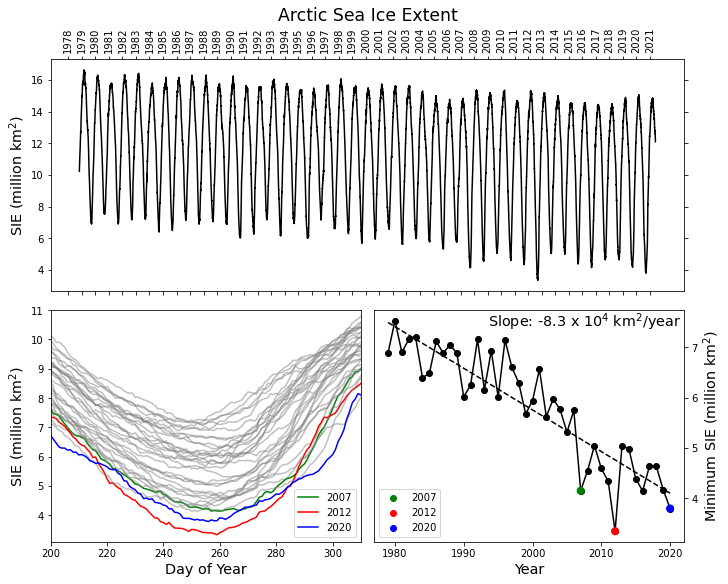

In [27]:
fig = plt.figure(constrained_layout=True,figsize=(10,8))

gs = fig.add_gridspec(2, 2)

top_ax = fig.add_subplot(gs[0, :])
top_ax.set_title('Arctic Sea Ice Extent', fontsize='xx-large')

top_ax.plot(x,y,color='k')

top_ax.set_xticks(np.arange(0,366*44,366))
top_ax.set_xticklabels(np.arange(1978,2022),rotation=90)

top_ax.xaxis.set_label_position('top') 
top_ax.xaxis.tick_top()
top_ax.yaxis.set_ticks_position('both')
top_ax.xaxis.set_ticks_position('both')


top_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')


#####################################


BL_ax = fig.add_subplot(gs[1, :-1])

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(200,310)
BL_ax.set_ylim(3.1,11)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='lower right')

#####################################

BR_ax = fig.add_subplot(gs[1:, -1])

BR_ax.plot(years,doy_mins,color='k',marker='o')

BR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)


BR_ax.plot([1979,2020],[1979*stats[0]+stats[1],2020*stats[0]+stats[1]],color='k',ls='--')

round_slope = np.round(100*stats[0],decimals=1)

BR_ax.annotate(xy=(0.99,0.93),text=f'Slope: {round_slope} x 10$^4$ km$^2$/year',
             fontsize='x-large', xycoords='axes fraction',ha='right')


BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='lower left')



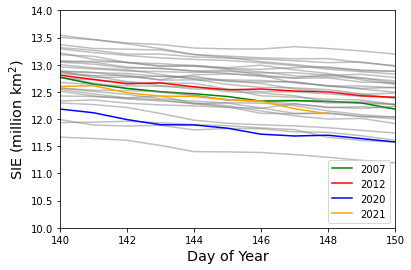

In [69]:

fig, BL_ax = plt.subplots(1,1)

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    elif col == 2021:
        color='orange'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(140,150)
BL_ax.set_ylim(10,14)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020,2021],
                       ['g','r','b','orange']):
    BL_ax.plot([],[],color=color,label=str(year))
    
BL_ax.legend(loc='lower right')
